# Proyek Analisis Data: Nama dataset

In [ ]:
- Nama: Aldiansyah Anugrah Ramadhan
- Email: aldiansyahaldi621@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- Berapa kadar rataan tahunan PM2.5, PM10, CO, O3, NO2 dan SO2 di kota Aotizhongxin dan kapan mencapai nilai maksimum dan minimum ? 
- Berapa kadar rataan tahunan PM2.5, PM10, CO, O3, NO2 dan SO2 di kota Wanshouxigong dan kapan mencapai nilai maksimum dan minimum ? 

## Menyiapkan semua library yang dibutuhkan

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [3]:
#Import dataset dengan menggunakan pandas
aotizhongxin_df = pd.read_csv('./data/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
wanshouxigong_df = pd.read_csv('./data/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

### Assessing Data

In [4]:
#Mengecek isi datasheet PRSA_Data_Aotizhongxin_20130301-20170228.csv
aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [5]:
#Mengecek isi datasheet PRSA_Data_Wanshouxigong_20130301-20170228.csv
wanshouxigong_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


In [6]:
#Memeriksa tipe data dari tiap kolom dataset PRSA_Data_Aotizhongxin_20130301-20170228.csv
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [7]:
#Menghitung jumlah nilai kosong dari dataset PRSA_Data_Aotizhongxin_20130301-20170228.csv
aotizhongxin_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [8]:
#Memeriksa parameter statistik dari dataset PRSA_Data_Aotizhongxin_20130301-20170228.csv
aotizhongxin_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [9]:
#Menghitung jumlah duplikasi data dari dataset PRSA_Data_Aotizhongxin_20130301-20170228.csv
aotizhongxin_df.duplicated().sum()

0

In [10]:
#Memeriksa tipe data dari tiap kolom dataset PRSA_Data_Wanshouxigong_20130301-20170228.csv
wanshouxigong_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [11]:
#Menghitung jumlah nilai kosong dari dataset PRSA_Data_Wanshouxigong_20130301-20170228.csv
wanshouxigong_df.isna().sum() 

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

In [12]:
#Menghitung jumlah duplikasi data dari dataset PRSA_Data_Wanshouxigong_20130301-20170228.csv
wanshouxigong_df.duplicated().sum()

0

In [13]:
#Memeriksa tipe data dari tiap kolom dataset PRSA_Data_Wanshouxigong_20130301-20170228.csv
wanshouxigong_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


### Cleaning Data

In [14]:
#Menangani missing value dari kolom PM10 dataset PRSA_Data_Aotizhongxin_20130301-20170228.csv
aotizhongxin_df[aotizhongxin_df.PM10.isna()]

#Mengisi missing value dari kolom PM10 dataset PRSA_Data_Aotizhongxin_20130301-20170228.csv dengan metode interpolasi linear
aotizhongxin_df.PM10.interpolate(method='linear', limit_direction='forward', inplace=True)

In [15]:
#Menangani missing value dari kolom SO2 dataset PRSA_Data_Aotizhongxin_20130301-20170228.csv
aotizhongxin_df[aotizhongxin_df.SO2.isna()]

#Mengisi missing value dari kolom SO2 dataset PRSA_Data_Aotizhongxin_20130301-20170228.csv dengan metode interpolasi linear
aotizhongxin_df.SO2.interpolate(method='linear', limit_direction='forward', inplace=True)

In [16]:
#Menangani missing value dari kolom NO2 dataset PRSA_Data_Aotizhongxin_20130301-20170228.csv
aotizhongxin_df[aotizhongxin_df.NO2.isna()]

#Mengisi missing value dari kolom NO2 dataset PRSA_Data_Aotizhongxin_20130301-20170228.csv dengan metode interpolasi linear
aotizhongxin_df.NO2.interpolate(method='linear', limit_direction='forward', inplace=True)

In [17]:
#Menangani missing value dari kolom CO dataset PRSA_Data_Aotizhongxin_20130301-20170228.csv
aotizhongxin_df[aotizhongxin_df.CO.isna()]

#Mengisi missing value dari kolom CO dataset PRSA_Data_Aotizhongxin_20130301-20170228.csv dengan metode interpolasi linear
aotizhongxin_df.CO.interpolate(method='linear', limit_direction='forward', inplace=True)

In [18]:
#Menangani missing value dari kolom O3 dataset PRSA_Data_Aotizhongxin_20130301-20170228.csv
aotizhongxin_df[aotizhongxin_df.O3.isna()]

#Mengisi missing value dari kolom O3 dataset PRSA_Data_Aotizhongxin_20130301-20170228.csv dengan metode interpolasi linear
aotizhongxin_df.O3.interpolate(method='linear', limit_direction='forward', inplace=True)

In [19]:
#Menangani missing value dari kolom PM2.5 dataset PRSA_Data_Aotizhongxin_20130301-20170228.csv
aotizhongxin_df[aotizhongxin_df['PM2.5'].isna()]

#Mengisi missing value dari kolom PM2.5 dataset PRSA_Data_Aotizhongxin_20130301-20170228.csv dengan metode interpolasi linear
aotizhongxin_df['PM2.5'].interpolate(method='linear', limit_direction='forward', inplace=True)

In [20]:
#Menangani missing value dari kolom PM10 dataset PRSA_Data_Wanshouxigong_20130301-20170228.csv
wanshouxigong_df[wanshouxigong_df.PM10.isna()]

#Mengisi missing value dari kolom PM10 dataset PRSA_Data_Wanshouxigong_20130301-20170228.csv dengan metode interpolasi linear
wanshouxigong_df.PM10.interpolate(method='linear', limit_direction='forward', inplace=True)

In [21]:
#Menangani missing value dari kolom SO2 dataset PRSA_Data_Wanshouxigong_20130301-20170228.csv
wanshouxigong_df[wanshouxigong_df.SO2.isna()]

#Mengisi missing value dari kolom SO2 dataset PRSA_Data_Wanshouxigong_20130301-20170228.csv dengan metode interpolasi linear
wanshouxigong_df.SO2.interpolate(method='linear', limit_direction='forward', inplace=True)

In [22]:
#Menangani missing value dari kolom NO2 dataset PRSA_Data_Wanshouxigong_20130301-20170228.csv
wanshouxigong_df[wanshouxigong_df.NO2.isna()]

#Mengisi missing value dari kolom NO2 dataset PRSA_Data_Wanshouxigong_20130301-20170228.csv dengan metode interpolasi linear
wanshouxigong_df.NO2.interpolate(method='linear', limit_direction='forward', inplace=True)

In [23]:
#Menangani missing value dari kolom CO dataset PRSA_Data_Wanshouxigong_20130301-20170228.csv
wanshouxigong_df[wanshouxigong_df.CO.isna()]

#Mengisi missing value dari kolom CO dataset PRSA_Data_Wanshouxigong_20130301-20170228.csv dengan metode interpolasi linear
wanshouxigong_df.CO.interpolate(method='linear', limit_direction='forward', inplace=True)

In [24]:
#Menangani missing value dari kolom O3 dataset PRSA_Data_Wanshouxigong_20130301-20170228.csv
wanshouxigong_df[wanshouxigong_df.O3.isna()]

#Mengisi missing value dari kolom O3 dataset PRSA_Data_Wanshouxigong_20130301-20170228.csv dengan metode interpolasi linear
wanshouxigong_df.O3.interpolate(method='linear', limit_direction='forward', inplace=True)

In [25]:
#Menangani missing value dari kolom PM2.5 dataset PRSA_Data_Wanshouxigong_20130301-20170228.csv
wanshouxigong_df[wanshouxigong_df['PM2.5'].isna()]

#Mengisi missing value dari kolom PM2.5 dataset PRSA_Data_Wanshouxigong_20130301-20170228.csv dengan metode interpolasi linear
wanshouxigong_df['PM2.5'].interpolate(method='linear', limit_direction='forward', inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

In [26]:
#Membuat kolom tanggal pada dataset PRSA_Data_Aotizhongxin_20130301-20170228.csv
date = pd.DataFrame({
    'year': aotizhongxin_df['year'],
    'month': aotizhongxin_df['month'],
    'day': aotizhongxin_df['day'],
})

aotizhongxin_df['date'] = pd.to_datetime(date)

In [27]:
#Set kolom date sebagai index
aotizhongxin_df.set_index('date', inplace=True)

#Membuat dataframe yearly_aotizhongxin_df
yearly_aotizhongxin_df = aotizhongxin_df.resample(rule='Y').agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean"
})

#Mengonversi satuan date menjadi tahun
yearly_aotizhongxin_df.index = yearly_aotizhongxin_df.index.strftime('%Y')

#Reset index dataframe yearly_aotizhongxin_df
yearly_aotizhongxin_df = yearly_aotizhongxin_df.reset_index()

#Mengganti nama kolom date menjadi year
yearly_aotizhongxin_df.rename(columns={
    "date": "year"
}, inplace=True)

In [28]:
#Menampilkan rataan tahunan kadar PM2.5, PM10, SO2, NO2, CO2 dan O3 dari dataset PRSA_Data_Aotizhongxin_20130301-20170228.csv
yearly_aotizhongxin_df

,year,PM2.5,PM10,SO2,NO2,CO,O3
0,2013,82.439202,112.940836,23.599799,63.355500,1163.919458,47.206555
1,2014,89.747603,122.282112,21.515582,63.164053,1186.718037,48.594041
2,2015,81.831724,112.176747,14.354195,60.939047,1436.889269,63.604132
3,2016,74.236680,94.445811,10.833732,48.402493,1190.215164,61.854793
4,2017,94.379237,106.988347,20.827331,66.229520,1666.454802,47.436088


In [29]:
#Membuat kolom tanggal pada dataset PRSA_Data_Wanshouxigong_20130301-20170228.csv
date = pd.DataFrame({
    'year': wanshouxigong_df['year'],
    'month': wanshouxigong_df['month'],
    'day': wanshouxigong_df['day'],
})

wanshouxigong_df['date'] = pd.to_datetime(date)

In [30]:
#Set kolom date sebagai index
wanshouxigong_df.set_index('date', inplace=True)

#Membuat dataframe yearly_aotizhongxin_df
yearly_wanshouxigong_df = wanshouxigong_df.resample(rule='Y').agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean"
})

#Mengonversi satuan date menjadi tahun
yearly_wanshouxigong_df.index = yearly_wanshouxigong_df.index.strftime('%Y')

#Reset index data yearly_aotizhongxin_df
yearly_wanshouxigong_df = yearly_wanshouxigong_df.reset_index()

#Mengganti nama kolom date menjadi year
yearly_wanshouxigong_df.rename(columns={
    "date": "year"
}, inplace=True)

In [31]:
#Menampilkan rataan tahunan kadar PM2.5, PM10, SO2, NO2, CO2 dan O3 dari dataset PRSA_Data_Wanshouxigong_20130301-20170228.csv
yearly_wanshouxigong_df

,year,PM2.5,PM10,SO2,NO2,CO,O3
0,2013,83.784586,111.195057,21.781023,55.950066,1411.235226,52.658367
1,2014,90.482100,127.157100,23.190183,61.797568,1442.260274,56.443813
2,2015,84.276233,111.198973,14.384966,52.729372,1364.229452,59.251575
3,2016,78.112933,98.815289,10.635474,50.183117,1224.077869,58.318420
4,2017,106.262359,121.676554,18.565325,64.215395,1739.618644,34.106285


In [32]:
#Menyimpan dataset kadar PM2.5, PM10, SO2, NO2, CO dan O3 di Aotizhongxin yang sudah dibersihkan untuk digunakan di streamlit
#Membuat dataframe daily_aotizhongxin_df
daily_aotizhongxin_df = aotizhongxin_df.resample(rule='D').agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean"
})

#Reset index dataframe daily_aotizhongxin_df
daily_aotizhongxin_df = daily_aotizhongxin_df.reset_index()

In [34]:
#Menyimpan dataset yang sudah dibersihkan ke dalam folder data
path = "./data/aotizhongxin.csv"
daily_aotizhongxin_df.to_csv(path)

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

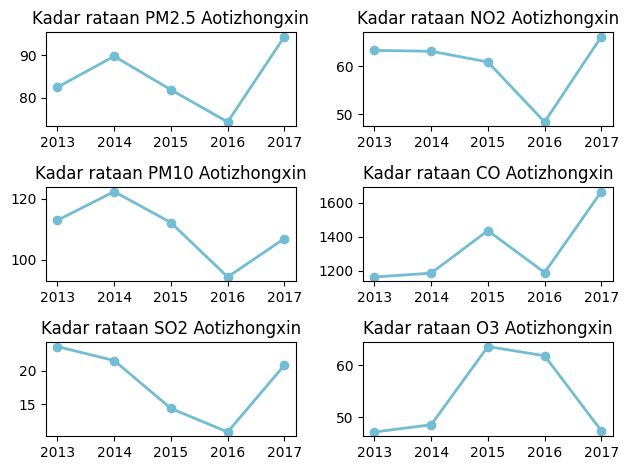

In [35]:
#Visualisasi data rataan tahunan kadar PM2.5, PM10, SO2, NO2, CO dan O3 di Aotizhongxin
fig, axs = plt.subplots(3, 2)
axs[0, 0].plot(yearly_aotizhongxin_df["year"], yearly_aotizhongxin_df["PM2.5"], marker='o', linewidth=2, color="#72BCD4")
axs[0, 0].set_title("Kadar rataan PM2.5 Aotizhongxin")
axs[1, 0].plot(yearly_aotizhongxin_df["year"], yearly_aotizhongxin_df["PM10"], marker='o', linewidth=2, color="#72BCD4")
axs[1, 0].set_title("Kadar rataan PM10 Aotizhongxin")
axs[2, 0].plot(yearly_aotizhongxin_df["year"], yearly_aotizhongxin_df["SO2"], marker='o', linewidth=2, color="#72BCD4")
axs[2, 0].set_title("Kadar rataan SO2 Aotizhongxin")
axs[2, 0].sharex(axs[0, 0])
axs[0, 1].plot(yearly_aotizhongxin_df["year"], yearly_aotizhongxin_df["NO2"], marker='o', linewidth=2, color="#72BCD4")
axs[0, 1].set_title("Kadar rataan NO2 Aotizhongxin")
axs[1, 1].plot(yearly_aotizhongxin_df["year"], yearly_aotizhongxin_df["CO"], marker='o', linewidth=2, color="#72BCD4")
axs[1, 1].set_title("Kadar rataan CO Aotizhongxin")
axs[2, 1].plot(yearly_aotizhongxin_df["year"], yearly_aotizhongxin_df["O3"], marker='o', linewidth=2, color="#72BCD4")
axs[2, 1].set_title("Kadar rataan O3 Aotizhongxin")
fig.tight_layout()

### Pertanyaan 2: 

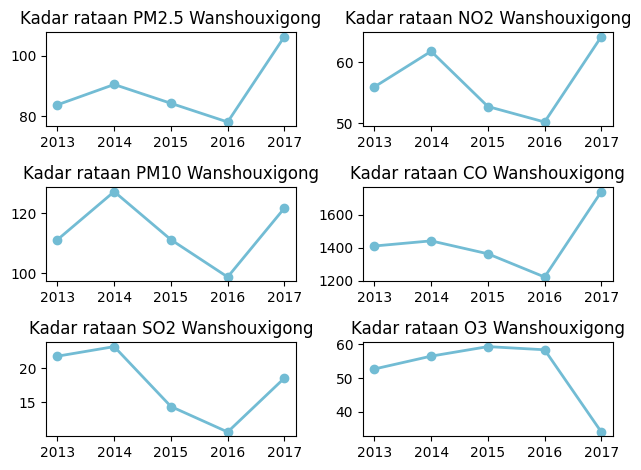

In [36]:
#Visualisasi data rataan tahunan kadar PM2.5, PM10, SO2, NO2, CO dan O3 di Wanshouxigong
fig, axs = plt.subplots(3, 2)
axs[0, 0].plot(yearly_wanshouxigong_df["year"], yearly_wanshouxigong_df["PM2.5"], marker='o', linewidth=2, color="#72BCD4")
axs[0, 0].set_title("Kadar rataan PM2.5 Wanshouxigong")
axs[1, 0].plot(yearly_wanshouxigong_df["year"], yearly_wanshouxigong_df["PM10"], marker='o', linewidth=2, color="#72BCD4")
axs[1, 0].set_title("Kadar rataan PM10 Wanshouxigong")
axs[2, 0].plot(yearly_wanshouxigong_df["year"], yearly_wanshouxigong_df["SO2"], marker='o', linewidth=2, color="#72BCD4")
axs[2, 0].set_title("Kadar rataan SO2 Wanshouxigong")
axs[2, 0].sharex(axs[0, 0])
axs[0, 1].plot(yearly_wanshouxigong_df["year"], yearly_wanshouxigong_df["NO2"], marker='o', linewidth=2, color="#72BCD4")
axs[0, 1].set_title("Kadar rataan NO2 Wanshouxigong")
axs[1, 1].plot(yearly_wanshouxigong_df["year"], yearly_wanshouxigong_df["CO"], marker='o', linewidth=2, color="#72BCD4")
axs[1, 1].set_title("Kadar rataan CO Wanshouxigong")
axs[2, 1].plot(yearly_wanshouxigong_df["year"], yearly_wanshouxigong_df["O3"], marker='o', linewidth=2, color="#72BCD4")
axs[2, 1].set_title("Kadar rataan O3 Wanshouxigong")
fig.tight_layout()

## Conclusion

- Aotizhongxin
Kadar maksimum dan minimum rataan tahunan PM2.5 secara berturut di tahun 2017 dan 2016
Kadar maksimum dan minimum rataan tahunan PM10 secara berturut di tahun 2017 dan 2016
Kadar maksimum dan minimum rataan tahunan SO2 secara berturut di tahun 2013 dan 2016
Kadar maksimum dan minimum rataan tahunan NO2 secara berturut di tahun 2017 dan 2016
Kadar maksimum dan minimum rataan tahunan CO secara berturut di tahun 2017 dan 2013
Kadar maksimum dan minimum rataan tahunan O3 secara berturut di tahun 2015 dan 2013

- Wanshouxigong
Kadar maksimum dan minimum rataan tahunan PM2.5 secara berturut di tahun 2017 dan 2016
Kadar maksimum dan minimum rataan tahunan PM10 secara berturut di tahun 2014 dan 2016
Kadar maksimum dan minimum rataan tahunan SO2 secara berturut di tahun 2014 dan 2016
Kadar maksimum dan minimum rataan tahunan NO2 secara berturut di tahun 2017 dan 2016
Kadar maksimum dan minimum rataan tahunan CO secara berturut di tahun 2017 dan 2013
Kadar maksimum dan minimum rataan tahunan O3 secara berturut di tahun 2015 dan 2017